In [1]:
import numpy as np
import pandas as pd
from copy import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.impute import SimpleImputer 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, hamming_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import wandb
import random

In [2]:
data = pd.read_csv("HousingData.csv")
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data = data.fillna(data.mean())
# print(data)
description = data.describe()
print(description)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.439466    2.1057

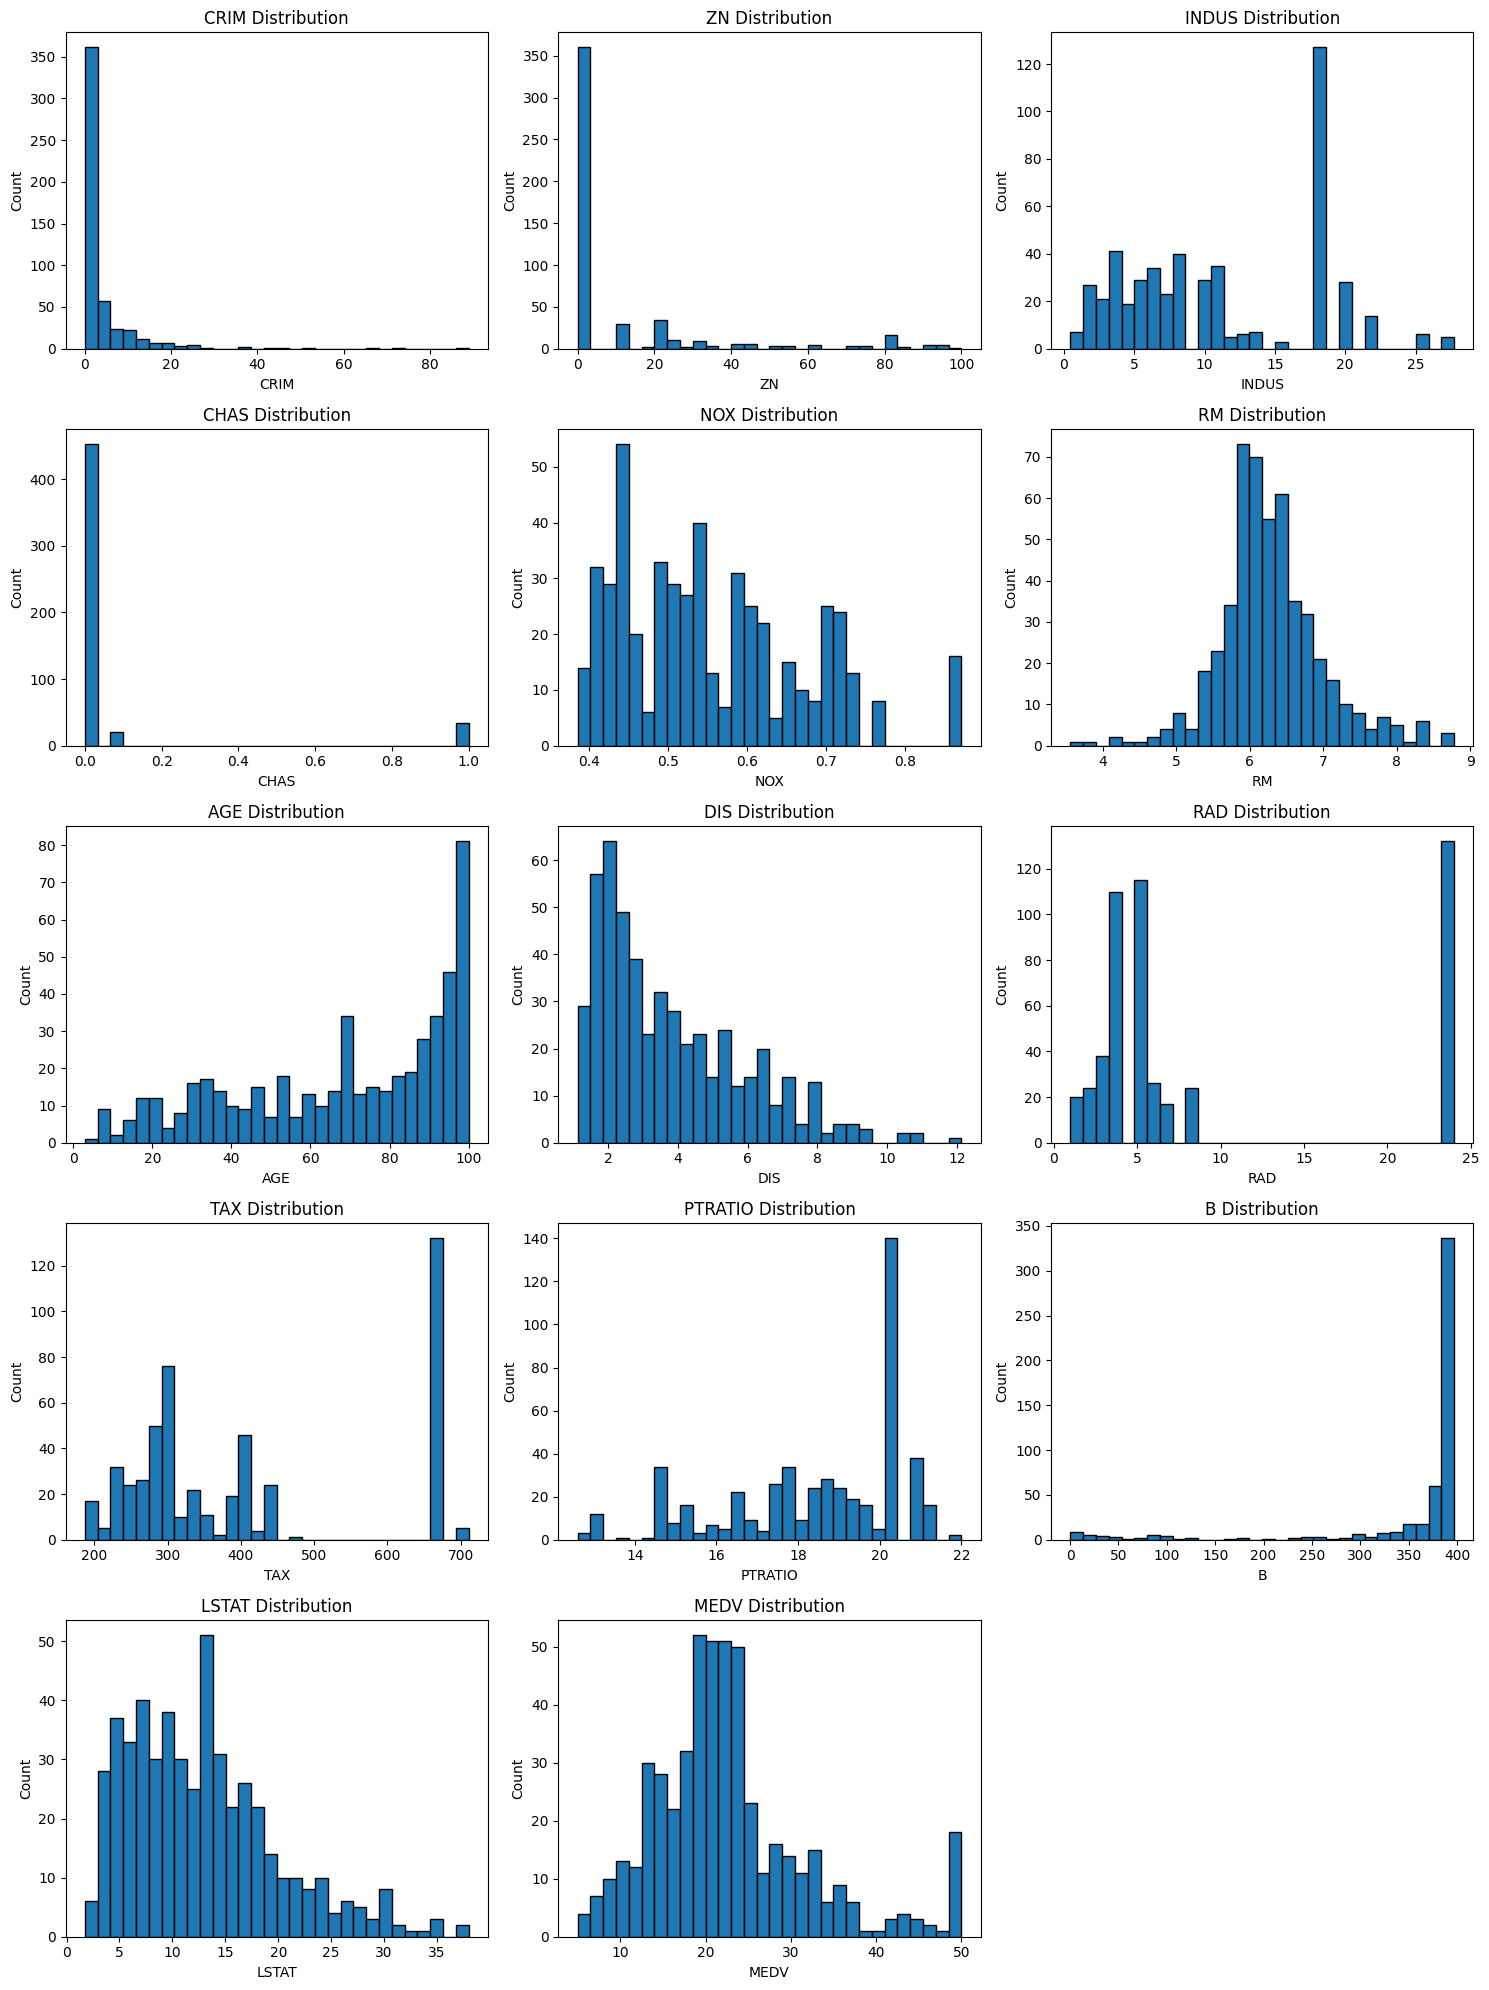

In [3]:
# plt.hist(data['MEDV'], bins=30, edgecolor='k')
# plt.xlabel('MEDV')
# plt.ylabel('Count')
# plt.title('MEDV Distribution')
# plt.show()

# Assuming data is a pandas DataFrame with the columns you mentioned
label_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Set up subplots to display multiple histograms
num_rows = 5  # You can adjust the number of rows and columns as needed
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate through each label and create a histogram
for i, label in enumerate(label_names):
    ax = axes[i]
    ax.hist(data[label], bins=30, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title(f'{label} Distribution')

# If you have more labels than subplots, you may want to hide the extra subplots
for i in range(len(label_names), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [4]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_train_std = std_scaler.fit_transform(X_train)
X_val_std = std_scaler.transform(X_val)
X_test_std = std_scaler.transform(X_test)

X_train_norm = minmax_scaler.fit_transform(X_train_std)
X_val_norm = minmax_scaler.transform(X_val_std)
X_test_norm = minmax_scaler.transform(X_test_std)
X_train = X_train_norm
X_val = X_val_norm
X_test = X_test_norm
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
print(X_train)
print(y_train)

[[5.18056442e-04 3.47368421e-01 3.65623822e-02 ... 6.17021277e-01
  9.91833629e-01 1.43487859e-01]
 [2.97300779e-04 2.63157895e-01 1.37580098e-01 ... 6.80851064e-01
  9.84123764e-01 1.59492274e-01]
 [1.74592552e-03 2.31578947e-01 1.75273276e-01 ... 6.91489362e-01
  9.43723054e-01 2.14955850e-01]
 ...
 [6.68786251e-05 8.42105263e-01 3.01545420e-02 ... 4.68085106e-01
  9.84884606e-01 1.17549669e-01]
 [1.25342233e-01 0.00000000e+00 6.36637769e-01 ... 8.08510638e-01
  2.72001014e-01 5.94370861e-01]
 [2.46945108e-03 0.00000000e+00 2.77044855e-01 ... 8.82978723e-01
  1.72964748e-01 2.45584989e-01]]
[36.1 22.9 24.5 25.  50.  34.9 31.7 24.1 22.1 14.1 42.8 19.3 32.2 26.4
 21.8 21.7  8.3 46.7 43.1 31.5 10.5 16.7 20.  33.3 17.8 50.  20.5 23.2
 13.1 19.6 22.8 28.7 30.7 22.9 21.9 23.9 32.7 24.3 21.5 24.6  8.5 26.4
 23.1 15.   8.8 19.3 23.9 24.7 19.8 23.8 13.3 29.  27.1 34.6 13.3 15.6
 12.5 14.6 11.  24.8 17.3  8.1 21.4 15.6 23.3 32.  38.7 30.1 20.5 32.5
 42.3 24.3 20.6 22.  18.2 15.   6.3 20.1 21.4

In [6]:
class Neural_Network(object):
    def __init__(self, learning_rate=0.01,epochs = 5000, inputLayerSize: int = 2, hiddenLayerSize = [3,3,3] , outputLayerSize: int = 1):
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.activation = self.relu
        self.activationPrime = self.reluPrime
        self.learning_rate = learning_rate
        # Weights (parameters)
        self.num_layers = len(hiddenLayerSize)+1
        self.weights = []
        self.weights.append(np.random.randn(self.inputLayerSize, self.hiddenLayerSize[0]))
        for i in range(1,self.num_layers-1):
            self.weights.append(np.random.randn(self.hiddenLayerSize[i-1], self.hiddenLayerSize[i]))
        self.weights.append(np.random.randn(self.hiddenLayerSize[-1], self.outputLayerSize))
        self.optimizer = 'SGD'
        self.max_iterations = epochs

    def forward(self, X):
        self.z = [None] * (len(self.weights))
        self.a = [None] * (len(self.weights) - 1)

        self.z[0] = np.dot(X, self.weights[0])
        for i in range(0, len(self.a)):
            self.a[i] = self.activation(self.z[i])
            self.z[i + 1] = np.dot(self.a[i], self.weights[i + 1])
        yHat = self.z[-1]  # Linear activation for regression
        return yHat

    def relu(self, z):
        return np.maximum(0, z)  # ReLU activation

    def tanh(self, z):
        return np.tanh(z)  # Tanh activation

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))  # Subtracting max(z) for numerical stability
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = np.sum((y - self.yHat) ** 2) / (2 * len(X))  # Mean Squared Error
        return J

    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        deltas = [None] * (len(self.weights))
        deltas[-1] = -(y - self.yHat)
        dJdWs = [None] * (len(self.weights))
        for i in range(len(deltas) - 2, -1, -1):
            dJdWs[i + 1] = np.dot(self.a[i].T, deltas[i + 1])
            deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * self.activationPrime(self.z[i])
        dJdWs[0] = np.dot(X.T, deltas[0])
        return dJdWs

    def reluPrime(self, z):
        return np.where(z > 0, 1, 0)  # Derivative of ReLU

    def tanhPrime(self, z):
        return 1 - np.tanh(z)**2  # Derivative of Tanh

    def backward(self, X, y, learning_rate):
        dJdWs = self.costFunctionPrime(X, y)
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * dJdWs[i]
        # self.W1 -= learning_rate * dJdW1
        # self.W2 -= learning_rate * dJdW2
    def train(self, X, y, batch_size = 32, learning_rate=0.1, max_iterations=10000,wand = 0):
        if(self.optimizer == 'SGD'):
            return self.train_sgd(X=X, y=y,wand=wand)
        elif(self.optimizer == 'Batch'):
            return self.train_batch(X=X, y=y,wand=wand)
        elif(self.optimizer == 'MiniBatch'):
            return self.train_mini_batch(X=X, y=y,wand=wand)
    def train_sgd(self, X, y, learning_rate=0.1, max_iterations=10000, wand = 0):
        if(wand == 1):
            wandb.init(project="Reporting loss on Housing Dataset in MLP Regression")
        for i in range(self.max_iterations):
            idx = np.random.randint(len(X))
            self.backward(X[idx:idx+1], y[idx:idx+1], self.learning_rate)
            if i % 1 == 0:
                loss = self.costFunction(X, y)
                # print("Iteration %d: loss = %f" % (i, loss))
                if(wand == 1):
                    wandb.log({"Loss": loss, "Epoch": i})
        loss = self.costFunction(X, y)
        return loss
        print("Training completed.")
    def train_batch(self, X, y, learning_rate=0.0001, max_iterations=10000, wand = 0):
        if(wand == 1):
            wandb.init(project="Reporting loss on Housing Dataset in MLP Regression")
        for i in range(self.max_iterations):
            self.backward(X, y, self.learning_rate)
            if i % 1 == 0:
                loss = self.costFunction(X, y)
                # print("Iteration %d: loss = %f" % (i, loss))
                if(wand == 1):
                    wandb.log({"Loss": loss, "Epoch": i})
        loss = self.costFunction(X, y)
        return loss
        print("Training completed.")
    def train_mini_batch(self, X, y, batch_size=32, learning_rate=0.01, max_iterations=5000, wand = 0):
        if(wand == 1):
            wandb.init(project="Reporting loss on Housing Dataset in MLP Regression")
        for i in range(self.max_iterations):
            # Randomly shuffle the data and split into mini-batches
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                self.backward(X[batch_indices], y[batch_indices], self.learning_rate)
            if i % 1 == 0:
                loss = self.costFunction(X, y)
                # print("Iteration %d: loss = %f" % (i, loss))
                if(wand == 1):
                    wandb.log({"Loss": loss, "Epoch": i})
        loss = self.costFunction(X, y)
        return loss
        print("Training completed.")

    def predict(self, X):
        yHat = self.forward(X)
        return yHat
    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_function(self, activation_function):
        if(activation_function == 'sigmoid'):
            self.activation = self.sigmoid
            self.activationPrime = self.sigmoidPrime
        if(activation_function == 'relu'):
            self.activation = self.relu
            self.activationPrime = self.reluPrime
        if(activation_function == 'tanh'):
            self.activation = self.tanh
            self.activationPrime = self.tanhPrime

    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

    def set_hidden_layers(self, hidden_layer_sizes):
        self.hiddenLayerSize = hidden_layer_sizes
        self.num_layers = len(self.hiddenLayerSize)+1
        self.weights = []
        self.weights.append(np.random.randn(self.inputLayerSize, self.hiddenLayerSize[0]))
        for i in range(1,self.num_layers-1):
            self.weights.append(np.random.randn(self.hiddenLayerSize[i-1], self.hiddenLayerSize[i]))
        self.weights.append(np.random.randn(self.hiddenLayerSize[-1], self.outputLayerSize))
        # self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        # self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        # self.weights, self.biases = self.initialize_weights()
    def set_epochs(self, epcohs):
        self.max_iterations = epochs
        print(self.max_iterations)


In [7]:
wandb.login()
np.random.seed(42)
model = Neural_Network(learning_rate=0.0001,epochs=5000, inputLayerSize=13, hiddenLayerSize=[13,13,13,13,13,13,13,13,13], outputLayerSize=1)
model.max_iterations = 10000
y_train_array = np.array([[x] for x in y_train])
# print(y_train_array)
model.set_activation_function('sigmoid')
model.set_optimizer('Batch')
print(X_train.shape)
model.train(X_train, y_train_array,wand=1)
y_pred = model.predict(X_val)
for i in range(len(y_val)):
    print(y_val[i], y_pred[i][0])
y_pred_new = np.array(y_pred).flatten()
mse = ((y_val - y_pred_new) ** 2).mean()
mae = (abs(y_val-y_pred_new)).mean()
print("MAE: ", mae)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
mean_y_val = y_val.mean()
ssr = ((y_val - y_pred_new) ** 2).sum()
sst = ((y_val - mean_y_val) ** 2).sum()
r2 = 1 - (ssr / sst)
print("R squared: ", r2)
# print(y_val)
# print(y_pred)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lsamourya07 (mourya). Use `wandb login --relogin` to force relogin


(303, 13)


15.0 14.215399948891598
19.4 22.21759931722929
17.1 17.364852049393868
28.7 23.3949450755624
17.0 18.0061191891593
21.5 21.125560877808162
31.5 32.356154474908074
36.2 23.98325677501756
14.5 16.47025646461404
16.6 17.771560243509587
23.6 24.60551477878415
12.3 22.66417002353607
23.1 20.581282047909013
20.0 21.429501985137165
20.4 20.72500473106628
24.1 21.376939963947354
22.6 23.10436963679989
14.5 17.944621575237576
21.7 18.272980473662784
19.7 16.53905255680284
21.1 21.481422860360144
13.8 9.472886180487754
19.2 20.169569328735378
33.4 31.96572503796573
13.8 16.392356194842712
22.4 21.14822835213093
21.2 20.00521162057897
26.7 28.690351125552713
17.2 9.68101609887166
23.4 23.868306720571397
20.1 17.764941595279332
24.2 24.817707312195097
27.5 26.25689789157931
19.1 13.778736174698334
17.4 18.433444524904868
17.5 17.963622438157767
22.8 23.503521768441484
13.4 9.798078601638924
26.5 22.78412757199366
18.7 17.52838308889049
17.8 13.222998814034614
5.0 9.511775388699384
26.2 24.24247829

In [9]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [10]:

sweep_config = {
    "name": "MLP Regression using different activation functions and optimizers",
    "method": "grid", 
    "metric": {"goal": "minimize", "name": "MSE"},
    "parameters": {
        "activation": {"values": ["sigmoid", "tanh", "relu"]},
        "optimizer": {"values": ["SGD", "Batch", "MiniBatch"]},
    },
    "early_terminate": {
        "type": "hyperband",
        "s": 2,
        "eta": 3,
        "max_iter": 9,
    },
}

sweep_id = wandb.sweep(sweep_config, project="MLP Regression using different activation functions and optimizers")

def train():
    wandb.init(project="MLP Regression using different activation functions and optimizers")
    
    config = wandb.config

    activation = config.activation
    optimizer = config.optimizer

    np.random.seed(27)
    mlp_sgd = Neural_Network(learning_rate=0.001,epochs=5000, inputLayerSize=13, hiddenLayerSize=[13,13,13], outputLayerSize=1)
    mlp_sgd.set_activation_function(activation)
    mlp_sgd.set_optimizer(optimizer)
    loss = mlp_sgd.train(X_train, y_train_array)
    y_pred = mlp_sgd.predict(X_val)
    y_pred_new = np.array(y_pred).flatten()
    mse = ((y_val - y_pred_new) ** 2).mean()
    mae = (abs(y_val-y_pred_new)).mean()
    print("MAE: ", mae)
    print("MSE: ", mse)
    rmse = np.sqrt(mse)
    print("RMSE: ", rmse)
    mean_y_val = y_val.mean()
    ssr = ((y_val - y_pred_new) ** 2).sum()
    sst = ((y_val - mean_y_val) ** 2).sum()
    r2 = 1 - (ssr / sst)
    print("R squared: ", r2)
    if(mse < 1000):
        wandb.log({"activation": activation, "optimizer": optimizer, "MSE": mse, "RMSE": rmse, "R squared": r2})
    else:
        wandb.log({"activation": activation, "optimizer": optimizer, "MSE": random.uniform(500.0, 600.0), "RMSE": random.randint(20.0,30.0), "R squared": -1})

wandb.agent(sweep_id, function=train)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: qbho3ngk
Sweep URL: https://wandb.ai/mourya/MLP%20Regression%20using%20different%20activation%20functions%20and%20optimizers/sweeps/qbho3ngk
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: kxxirg1z with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  2.9530026227437176
MSE:  17.549862513604904
RMSE:  4.18925560375646
R squared:  0.7331467310161874


Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntulsa/.local/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 285, in check_stop_status
    Exception in thread     self._loop_check_status(IntMsgThrself.run()
:

  File "/home/ubuntulsa/.local/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 223, in _loop_check_status
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 953, in run
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        local_handle = request()self._target(*self._args, **self._kwargs)

  File "/home/ubuntulsa/.local/lib/python3.10

MSE,▁
R squared,▁
RMSE,▁
MSE,17.54986
R squared,0.73315
RMSE,4.18926
activation,sigmoid
optimizer,SGD


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uk7kc1d2 with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: Batch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  2.7146818144463207
MSE:  13.151141917790918
RMSE:  3.6264503192227684
R squared:  0.8000311849217054


MSE,▁
R squared,▁
RMSE,▁
MSE,13.15114
R squared,0.80003
RMSE,3.62645
activation,sigmoid
optimizer,Batch


wandb: Agent Starting Run: 37z3jtvv with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: MiniBatch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  2.995443503420099
MSE:  18.492815777737306
RMSE:  4.300327403551654
R squared:  0.7188087177788973


MSE,▁
R squared,▁
RMSE,▁
MSE,18.49282
R squared,0.71881
RMSE,4.30033
activation,sigmoid
optimizer,MiniBatch


wandb: Agent Starting Run: wqu5cccw with config:
wandb: 	activation: tanh
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  2.8979930812849837
MSE:  15.048283663069968
RMSE:  3.879211732178326
R squared:  0.7711843221009334


MSE,▁
R squared,▁
RMSE,▁
MSE,15.04828
R squared,0.77118
RMSE,3.87921
activation,tanh
optimizer,SGD


wandb: Agent Starting Run: 19vp528g with config:
wandb: 	activation: tanh
wandb: 	optimizer: Batch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


/home/ubuntulsa/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_80907/2259170492.py:49: RuntimeWarning: overflow encountered in square
  J = np.sum((y - self.yHat) ** 2) / (2 * len(X))  # Mean Squared Error
/tmp/ipykernel_80907/2259170492.py:59: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * self.activationPrime(self.z[i])


MAE:  nan
MSE:  nan
RMSE:  nan
R squared:  nan


MSE,▁
R squared,▁
RMSE,▁
MSE,595.75392
R squared,-1
RMSE,27
activation,tanh
optimizer,Batch


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nwi9jupn with config:
wandb: 	activation: tanh
wandb: 	optimizer: MiniBatch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  2.593138946493851
MSE:  13.396831738974866
RMSE:  3.6601682664837782
R squared:  0.79629536466168


MSE,▁
R squared,▁
RMSE,▁
MSE,13.39683
R squared,0.7963
RMSE,3.66017
activation,tanh
optimizer,MiniBatch


wandb: Agent Starting Run: ho8kupsn with config:
wandb: 	activation: relu
wandb: 	optimizer: SGD
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  4.21855142811235
MSE:  28.193160912789157
RMSE:  5.309723242579518
R squared:  0.5713107640169739


MSE,▁
R squared,▁
RMSE,▁
MSE,28.19316
R squared,0.57131
RMSE,5.30972
activation,relu
optimizer,SGD


wandb: Agent Starting Run: 97ae09mx with config:
wandb: 	activation: relu
wandb: 	optimizer: Batch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  21.927722772277225
MSE:  546.5909900990099
RMSE:  23.379285491627197
R squared:  -7.311153001452126


MSE,▁
R squared,▁
RMSE,▁
MSE,546.59099
R squared,-7.31115
RMSE,23.37929
activation,relu
optimizer,Batch


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yp21y56b with config:
wandb: 	activation: relu
wandb: 	optimizer: MiniBatch
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


MAE:  21.927722772277225
MSE:  546.5909900990099
RMSE:  23.379285491627197
R squared:  -7.311153001452126


MSE,▁
R squared,▁
RMSE,▁
MSE,546.59099
R squared,-7.31115
RMSE,23.37929
activation,relu
optimizer,MiniBatch


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Error in callback <function _WandbInit._pause_backend at 0x7f1aa646c8b0> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [10]:
# activation = ["sigmoid", "tanh", "relu"]
# optimizer = ["SGD", "Batch", "MiniBatch"]
activation = ["sigmoid"]
optimizer = ["Batch"]
learning_rates = [0.001,0.0001]
epochs = [10,100,1000,10000]
hiddenlayersize = [[13], [13,13], [13,13,13], [13,13,13,13], [13,13,13,13,13]]
np.random.seed(42)
results = []
hyperparameters = []
for i in activation:
    for j in optimizer:
        for k in learning_rates:
            for l in epochs:
                for m in hiddenlayersize:
                    model = Neural_Network(learning_rate=k, epochs=l,inputLayerSize=13, hiddenLayerSize=m, outputLayerSize=1)
                    model.set_activation_function(i)
                    model.set_optimizer(j)
                    model.train(X_train, y_train_array)
                    y_pred = model.predict(X_val)
                    y_pred_new = np.array(y_pred).flatten()
                    mse = ((y_val - y_pred_new) ** 2).mean()
                    mae = (abs(y_val-y_pred_new)).mean()
                    rmse = np.sqrt(mse)
                    mean_y_val = y_val.mean()
                    ssr = ((y_val - y_pred_new) ** 2).sum()
                    sst = ((y_val - mean_y_val) ** 2).sum()
                    r2 = 1 - (ssr / sst)
                    print(mse, [i,j,k,l,m])
                    results.append([mse,rmse,r2])
                    hyperparameters.append([i, j, k, l, m])
result_df = pd.DataFrame(results, columns=['MSE', 'RMSE', 'R Squared'])
result_df['Activation'] = [param[0] for param in hyperparameters]
result_df['Optimizer'] = [param[1] for param in hyperparameters]
result_df['Learning Rate'] = [param[2] for param in hyperparameters]
result_df['Epochs'] = [param[3] for param in hyperparameters]
result_df['Hidden Layer Size'] = [param[4] for param in hyperparameters]

best_hyperparameters = result_df.loc[result_df['MSE'].idxmin()]

print("Best Hyperparameters:")
print(best_hyperparameters)

print("\nResults Table:")
print(result_df)            
                    


Error in callback <function _WandbInit._resume_backend at 0x7fbb0ea37250> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

41.848603233637924 ['sigmoid', 'Batch', 0.001, 10, [13]]
67.18609656449077 ['sigmoid', 'Batch', 0.001, 10, [13, 13]]
67.19447343357258 ['sigmoid', 'Batch', 0.001, 10, [13, 13, 13]]
67.1991253051949 ['sigmoid', 'Batch', 0.001, 10, [13, 13, 13, 13]]
66.93725227370837 ['sigmoid', 'Batch', 0.001, 10, [13, 13, 13, 13, 13]]
32.969165608744916 ['sigmoid', 'Batch', 0.001, 100, [13]]
44.25718935061583 ['sigmoid', 'Batch', 0.001, 100, [13, 13]]
38.5654301480893 ['sigmoid', 'Batch', 0.001, 100, [13, 13, 13]]
34.63811252095314 ['sigmoid', 'Batch', 0.001, 100, [13, 13, 13, 13]]
67.13245647119481 ['sigmoid', 'Batch', 0.001, 100, [13, 13, 13, 13, 13]]
10.393579690519456 ['sigmoid', 'Batch', 0.001, 1000, [13]]
11.995126082714837 ['sigmoid', 'Batch', 0.001, 1000, [13, 13]]
9.623851272406647 ['sigmoid', 'Batch', 0.001, 1000, [13, 13, 13]]
27.378654114226126 ['sigmoid', 'Batch', 0.001, 1000, [13, 13, 13, 13]]
67.19461061046621 ['sigmoid', 'Batch', 0.001, 1000, [13, 13, 13, 13, 13]]
18.60105617616258 ['si

BrokenPipeError: [Errno 32] Broken pipe

In [8]:
# Define the hyperparameter search space.
sweep_config = {
    'name': 'hyperparameter-sweep',
    "metric": {"goal": "minimize", "name": "MSE"},
    'method': 'grid',
    'parameters': {
        'learning_rate': {
            'values': [0.001, 0.0001]
        },
        'epochs': {
            'values': [10, 100, 1000, 10000]
        },
        'hiddenlayersize': {
            'values': [
                [13],
                [13, 13],
                [13, 13, 13],
                [13, 13, 13, 13],
                [13, 13, 13, 13, 13]
            ]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="Hyperparameter Tuning in MLP Regression.")

def train_neural_network():
    wandb.init(project="Hyperparameter Tuning in MLP Regression.")
    model = Neural_Network(learning_rate=wandb.config.learning_rate, epochs=wandb.config.epochs, inputLayerSize=13, hiddenLayerSize=wandb.config.hiddenlayersize, outputLayerSize=1)
    model.set_activation_function("sigmoid")
    model.set_optimizer("Batch")
    model.train(X_train, y_train_array)
    y_pred = model.predict(X_val).flatten()
    
    mse = ((y_val - y_pred) ** 2).mean()
    mae = (abs(y_val-y_pred)).mean()
    rmse = np.sqrt(mse)
    mean_y_val = y_val.mean()
    ssr = ((y_val - y_pred) ** 2).sum()
    sst = ((y_val - mean_y_val) ** 2).sum()
    r2 = 1 - (ssr / sst)
    print(mse)
    wandb.log({"MSE": mse, "RMSE": rmse, "R Squared": r2, "MAE": mae})

wandb.agent(sweep_id, function=train_neural_network)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 0xh6gllq
Sweep URL: https://wandb.ai/mourya/Hyperparameter%20Tuning%20in%20MLP%20Regression./sweeps/0xh6gllq
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: unw0bqin with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


52.52829851893548


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.31948
MSE,52.5283
R Squared,0.20128
RMSE,7.24764


wandb: Agent Starting Run: p3ltjfup with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.71862259817212


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.62156
MSE,67.71862
R Squared,-0.02969
RMSE,8.22913


wandb: Agent Starting Run: qu6jvmxg with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.22551954083933


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.12651
MSE,67.22552
R Squared,-0.02219
RMSE,8.19912


wandb: Agent Starting Run: rs0hr1jd with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


66.31040759162084


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.00019
MSE,66.31041
R Squared,-0.00828
RMSE,8.14312


wandb: Agent Starting Run: 9xox19rq with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


68.73141205797444


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.74797
MSE,68.73141
R Squared,-0.04509
RMSE,8.29044


wandb: Agent Starting Run: usb4v6ii with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


66.11160835906102


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.91713
MSE,66.11161
R Squared,-0.00526
RMSE,8.1309


wandb: Agent Starting Run: f2ml687c with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


66.88653380203115


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.10607
MSE,66.88653
R Squared,-0.01704
RMSE,8.17842


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cx3dsr6p with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


64.90471420755513


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.8162
MSE,64.90471
R Squared,0.0131
RMSE,8.05635


wandb: Agent Starting Run: uovpe878 with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.20422373322481


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.12733
MSE,67.20422
R Squared,-0.02187
RMSE,8.19782


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xf3i4qiq with config:
wandb: 	epochs: 10
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.05543610576065


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,5.79501
MSE,67.05544
R Squared,-0.01961
RMSE,8.18874


wandb: Agent Starting Run: 3sj5t6dd with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


26.88218677163762


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,4.21333
MSE,26.88219
R Squared,0.59124
RMSE,5.1848


wandb: Agent Starting Run: i82auibv with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


34.15977725323785


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,4.10827
MSE,34.15978
R Squared,0.48059
RMSE,5.84464


wandb: Agent Starting Run: ryqzaveq with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


30.0682763898018


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.61492
MSE,30.06828
R Squared,0.5428
RMSE,5.48345


wandb: Agent Starting Run: dx0hnsuk with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


26.094825181561955


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.58352
MSE,26.09483
R Squared,0.60322
RMSE,5.10831


wandb: Agent Starting Run: 55qvlru1 with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


63.88840520408014


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.84585
MSE,63.88841
R Squared,0.02855
RMSE,7.99302


wandb: Agent Starting Run: tg0f230d with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


21.954344336863986


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.29212
MSE,21.95434
R Squared,0.66617
RMSE,4.68555


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uhv6urrt with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


72.71522203676855


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,7.29046
MSE,72.71522
R Squared,-0.10567
RMSE,8.52732


wandb: Agent Starting Run: 9cw7g5t2 with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


65.99792619824684


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.06062
MSE,65.99793
R Squared,-0.00353
RMSE,8.12391


wandb: Agent Starting Run: 6sbfd0ym with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


67.19579471596745


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.12668
MSE,67.19579
R Squared,-0.02174
RMSE,8.1973


wandb: Agent Starting Run: hdlo4yb1 with config:
wandb: 	epochs: 100
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


29.067032883012192


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.76837
MSE,29.06703
R Squared,0.55802
RMSE,5.39139


wandb: Agent Starting Run: ia504da7 with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


13.814373767103191


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.79656
MSE,13.81437
R Squared,0.78995
RMSE,3.71677


wandb: Agent Starting Run: j1t39a61 with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


13.982605649212374


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.80179
MSE,13.98261
R Squared,0.78739
RMSE,3.73933


wandb: Agent Starting Run: 4akbp5ug with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


10.587503886564013


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.41387
MSE,10.5875
R Squared,0.83901
RMSE,3.25384


wandb: Agent Starting Run: 4tgw0tqf with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


10.874713258861703


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.48116
MSE,10.87471
R Squared,0.83465
RMSE,3.29768


wandb: Agent Starting Run: hqzgmkym with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


14.458110005417952


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.07369
MSE,14.45811
R Squared,0.78016
RMSE,3.80238


wandb: Agent Starting Run: epmbghja with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


12.638028222429783


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.78337
MSE,12.63803
R Squared,0.80783
RMSE,3.555


wandb: Agent Starting Run: 3kws3qa5 with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


11.320077232441356


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.54946
MSE,11.32008
R Squared,0.82787
RMSE,3.36453


wandb: Agent Starting Run: 3zo6q91l with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


11.6555849573337


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.74186
MSE,11.65558
R Squared,0.82277
RMSE,3.41403


wandb: Agent Starting Run: vhxphkrm with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


83.03605470158986


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,6.41704
MSE,83.03605
R Squared,-0.2626
RMSE,9.11241


wandb: Agent Starting Run: h6dlfz9f with config:
wandb: 	epochs: 1000
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


13.629087531145776


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.92547
MSE,13.62909
R Squared,0.79276
RMSE,3.69176


wandb: Agent Starting Run: 44va6p7y with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


15.349719493307196


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.47333
MSE,15.34972
R Squared,0.7666
RMSE,3.91787


wandb: Agent Starting Run: m79ji8tl with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


11.924199584795941


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.34817
MSE,11.9242
R Squared,0.81869
RMSE,3.45314


wandb: Agent Starting Run: ow4t7bz3 with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


18.71889588951332


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,3.17522
MSE,18.7189
R Squared,0.71537
RMSE,4.32653


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wf0ub3wj with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


9.840277731493792


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.17706
MSE,9.84028
R Squared,0.85037
RMSE,3.13692


wandb: Agent Starting Run: 5g9o6l51 with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


13.516145290680035


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.72954
MSE,13.51615
R Squared,0.79448
RMSE,3.67643


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qgcxuqdc with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


11.202867542521915


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.33324
MSE,11.20287
R Squared,0.82966
RMSE,3.34707


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9vmanrk3 with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


15.343224991549448


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.81583
MSE,15.34322
R Squared,0.7667
RMSE,3.91704


wandb: Agent Starting Run: 2lxeuv6j with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


15.921167973447197


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.47015
MSE,15.92117
R Squared,0.75791
RMSE,3.99013


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4p9ir3up with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


10.375846173241026


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.4155
MSE,10.37585
R Squared,0.84223
RMSE,3.22116


wandb: Agent Starting Run: 5o7e2jrc with config:
wandb: 	epochs: 10000
wandb: 	hiddenlayersize: [13, 13, 13, 13, 13]
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


12.517093716111798


MAE,▁
MSE,▁
R Squared,▁
RMSE,▁
MAE,2.33118
MSE,12.51709
R Squared,0.80967
RMSE,3.53795


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Error in callback <function _WandbInit._pause_backend at 0x7fd3794708b0> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [12]:
np.random.seed(42)
model = Neural_Network(learning_rate=0.001,epochs=5000, inputLayerSize=13, hiddenLayerSize=[13,13,13], outputLayerSize=1)
model.max_iterations = 1000
y_train_array = np.array([[x] for x in y_train])
model.set_activation_function('sigmoid')
model.set_optimizer('Batch')
print(X_train.shape)
model.train(X_train, y_train_array)
y_pred = model.predict(X_test)
y_pred_new = np.array(y_pred).flatten()
mse = ((y_test - y_pred_new) ** 2).mean()
mae = (abs(y_test-y_pred_new)).mean()
print("MAE: ", mae)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
mean_y_test = y_test.mean()
ssr = ((y_test - y_pred_new) ** 2).sum()
sst = ((y_test - mean_y_test) ** 2).sum()
r2 = 1 - (ssr / sst)
print("R squared: ", r2)

Error in callback <function _WandbInit._resume_backend at 0x7fbb0ea37250> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

(303, 13)
MAE:  3.056649993593861
MSE:  23.92162941541448
RMSE:  4.890974280796668
R squared:  0.7214194150250477
Error in callback <function _WandbInit._pause_backend at 0x7fbb0d33e3b0> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


69.57330416376821
